# Nicholas Latifi
<img src="https://www.formula1.com/content/fom-website/en/drivers/nicholas-latifi/_jcr_content/image.img.1920.medium.jpg/1646819118069.jpg" width="300">

### Team: Williams

<img src ="https://www.formula1.com/content/fom-website/en/drivers/nicholas-latifi/_jcr_content/helmet.img.png/1646824698284.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

lat_laps <- lap_data %>%
            filter(driverId == 849)

# Filtering Lap Data for WILLIAMS
wlms_lap <- lap_data %>%
             filter(driverId %in% c(9, 13, 814, 845, 851))

# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1045,56
1052,51


`geom_smooth()` using formula 'y ~ x'



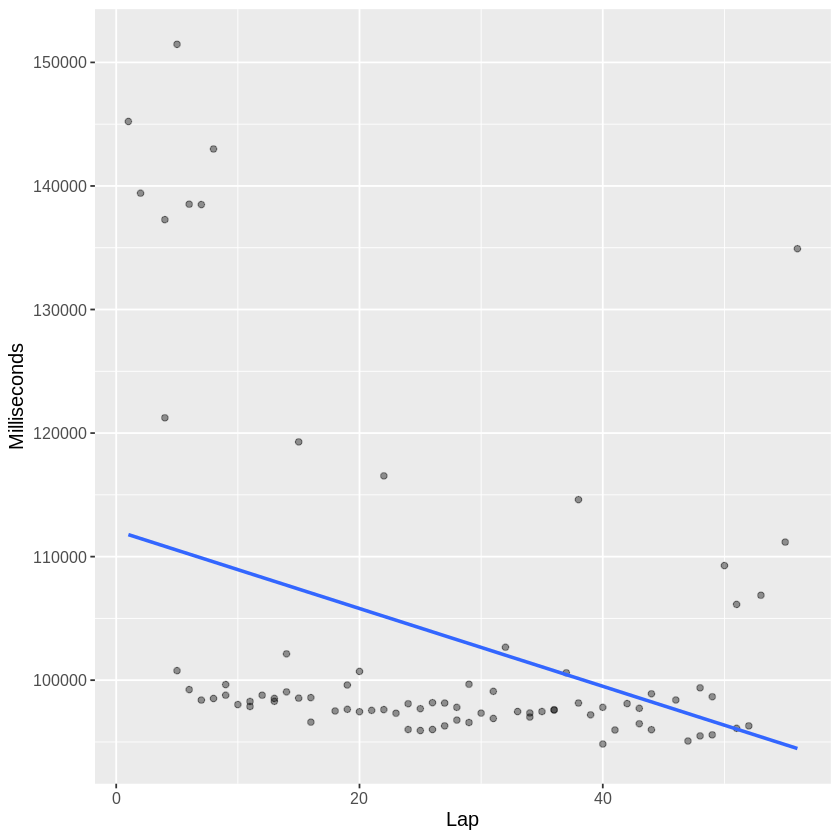

In [5]:
set.seed(2022)

#1. Bahrain 

nl_bahrain <- lat_laps %>%
                filter(raceId %in% bahrain_race_ID) 

nl_bahrain_clean <- nl_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
nl_bahrain_clean
nl_bahrain_clean_ID <- nl_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_bahrain_races <- lat_laps %>%
                    filter(raceId %in% nl_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(nl_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1042,64
1054,64


`geom_smooth()` using formula 'y ~ x'



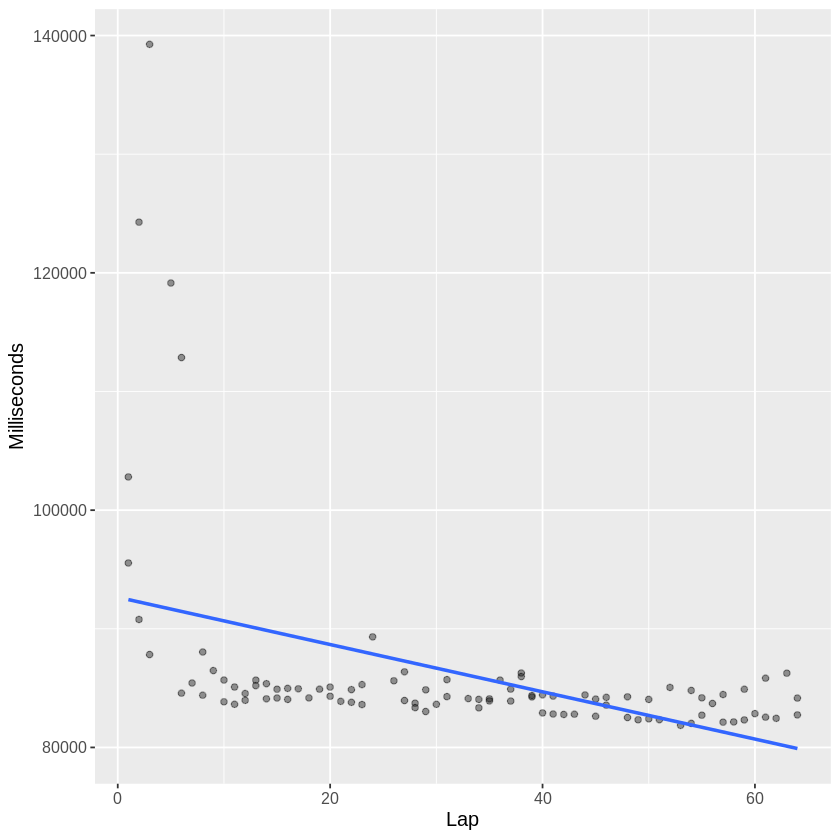

In [6]:
set.seed(2022)

#2. Portimão

nl_Portimão <- lat_laps %>%
                filter(raceId %in% Portimão_race_ID) 

nl_Portimão_clean <- nl_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_Portimão_clean
nl_Portimão_clean_ID <- nl_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_Portimão_races <- lat_laps %>%
                    filter(raceId %in% nl_Portimão_clean_ID) 

formulaone_split <- initial_split(nl_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
338,116
880,116
841,115
860,104
1,100
36,94
18,76
926,58
71,57


`geom_smooth()` using formula 'y ~ x'



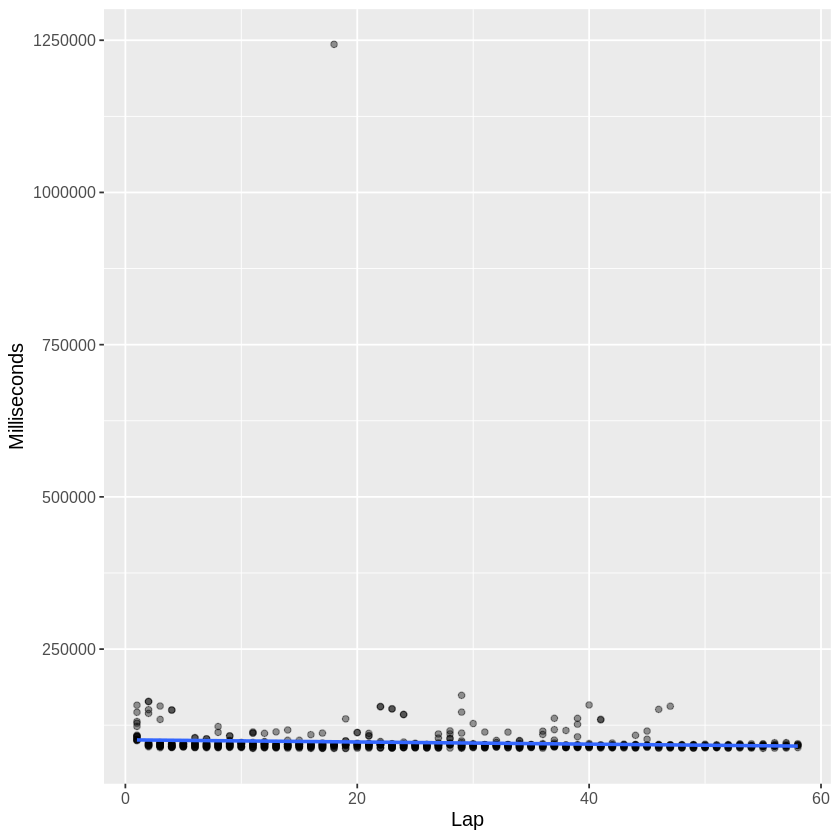

In [7]:
set.seed(2022)

#3. Australia

nl_aus <- wlms_lap %>%
                filter(raceId %in% aus_race_ID) 

nl_aus_clean <- nl_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_aus_clean
nl_aus_clean_ID <- nl_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_aus_races <- wlms_lap %>%
                    filter(raceId %in% nl_aus_clean_ID)

formulaone_split <- initial_split(nl_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

## GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,63


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



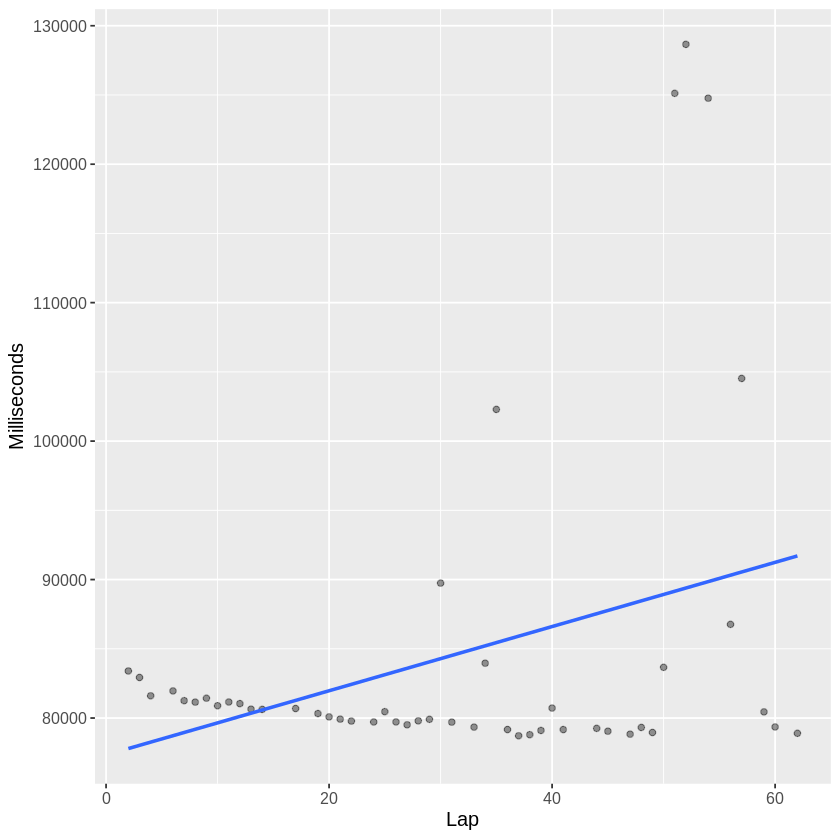

In [8]:
set.seed(2022)

#4. Italy, Imola

nl_imola <- lat_laps %>%
                filter(raceId %in% imola_race_ID) 

nl_imola_clean <- nl_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_imola_clean
nl_imola_clean_ID <- nl_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_imola_races <- lat_laps %>%
                    filter(raceId %in% nl_imola_clean_ID)

formulaone_split <- initial_split(nl_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1067,57
1044,39


`geom_smooth()` using formula 'y ~ x'



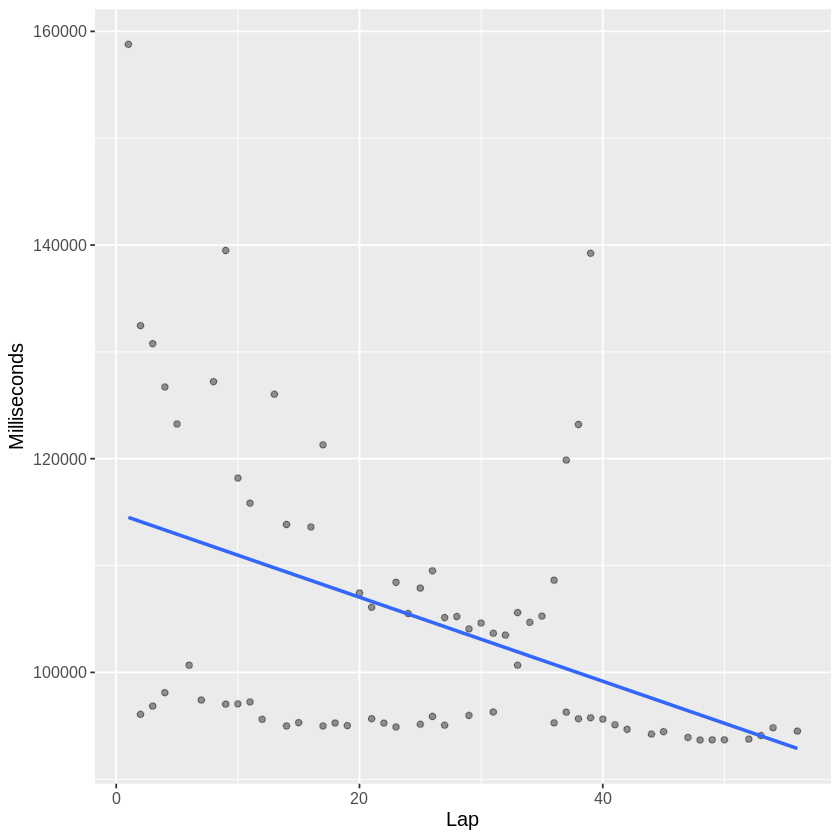

In [9]:
set.seed(2022)

#5. Turkey (Replacing Miami)

nl_turkey <- lat_laps %>%
                filter(raceId %in% turkey_race_ID) 

nl_turkey_clean <- nl_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_turkey_clean
nl_turkey_clean_ID <- nl_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_turkey_races <- lat_laps %>%
                    filter(raceId %in% nl_turkey_clean_ID)

formulaone_split <- initial_split(nl_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1055,65
1036,64


`geom_smooth()` using formula 'y ~ x'



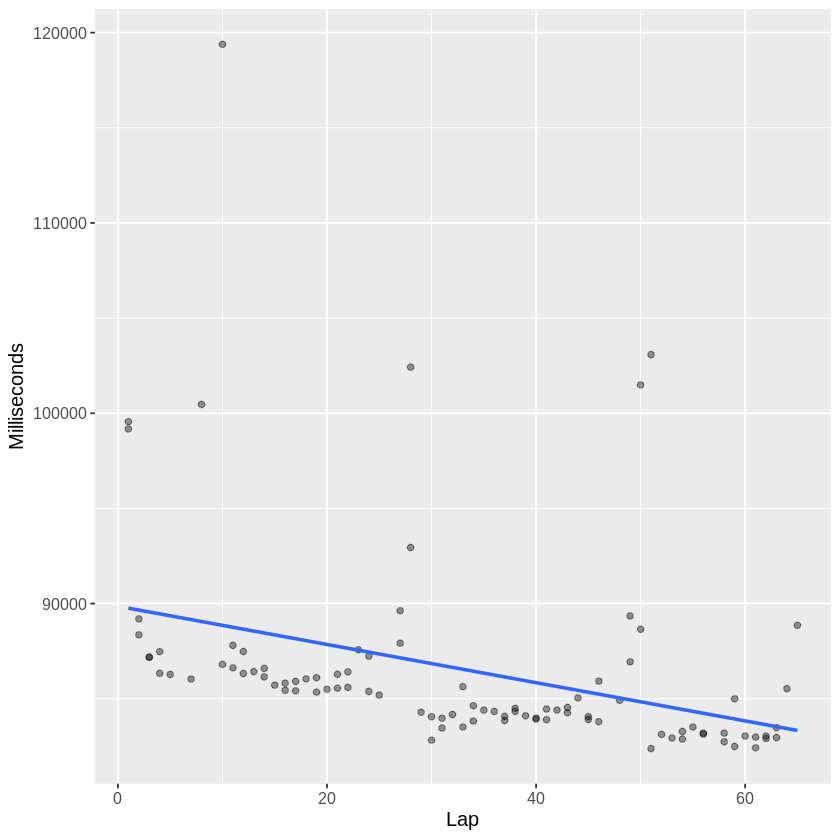

In [10]:
set.seed(2022)

#6. Spain

nl_spain <- lat_laps %>%
                filter(raceId %in% spain_race_ID) 

nl_spain_clean <- nl_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_spain_clean
nl_spain_clean_ID <- nl_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_spain_races <- lat_laps %>%
                    filter(raceId %in% nl_spain_clean_ID)

formulaone_split <- initial_split(nl_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1056,77


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



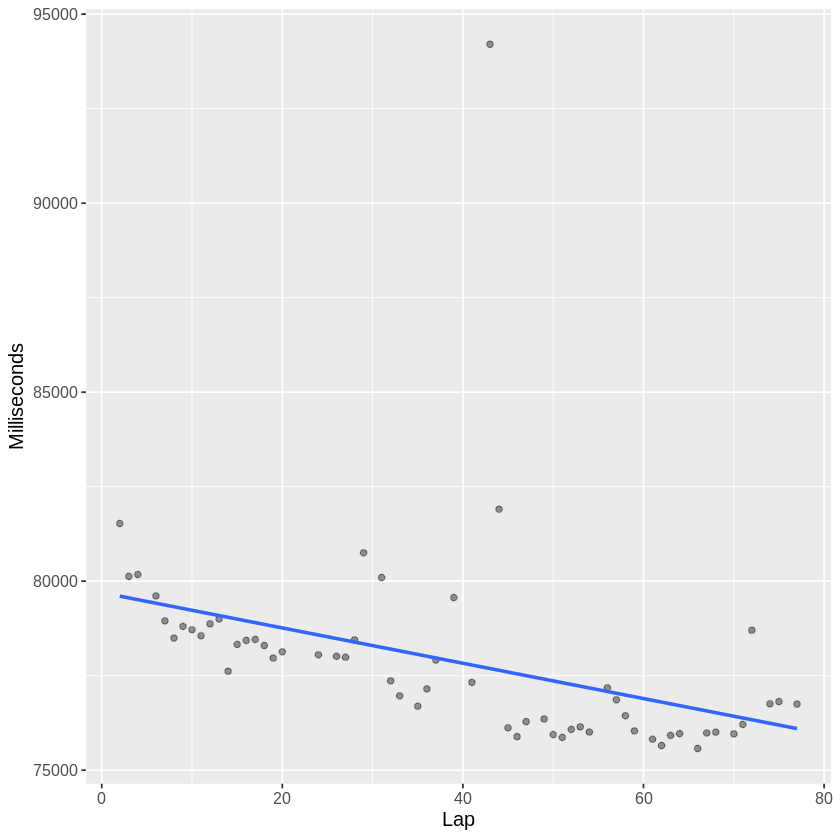

In [11]:
set.seed(2022)

#7. Monaco

nl_monaco <- lat_laps %>%
                filter(raceId %in% monaco_race_ID) 

nl_monaco_clean <- nl_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_monaco_clean
nl_monaco_clean_ID <- nl_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_monaco_races <- lat_laps %>%
                    filter(raceId %in% nl_monaco_clean_ID)

formulaone_split <- initial_split(nl_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1057,51


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



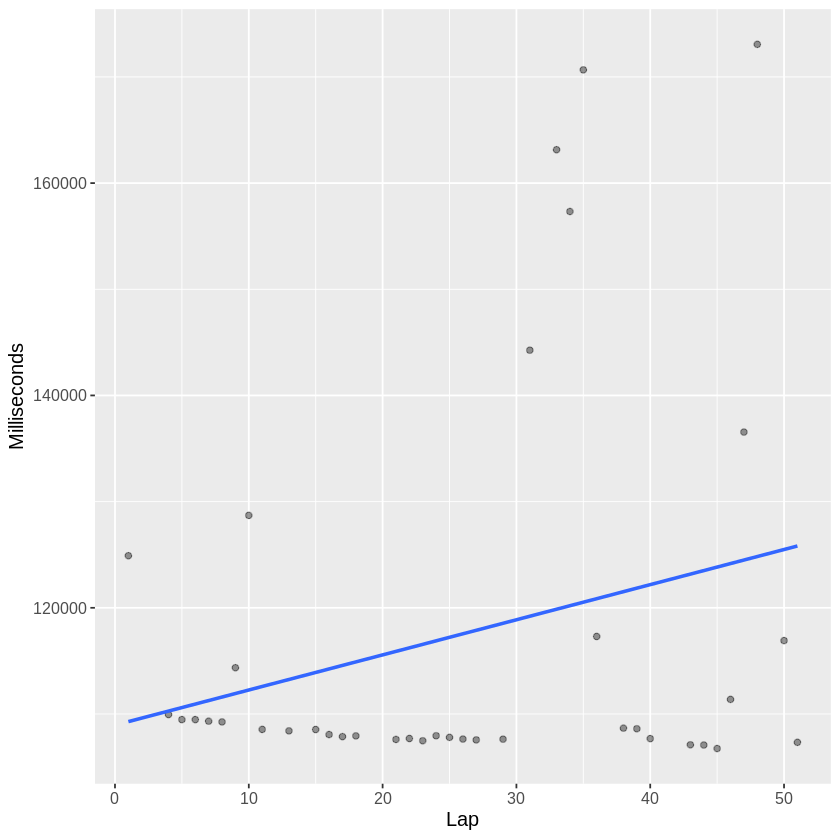

In [12]:
set.seed(2022)

#8. Azerbaijan

nl_azerbaijan <- lat_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

nl_azerbaijan_clean <- nl_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_azerbaijan_clean
nl_azerbaijan_clean_ID <- nl_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_azerbaijan_races <- lat_laps %>%
                    filter(raceId %in% nl_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(nl_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
24,140
866,140
344,139
886,138
847,137
41,77
61,70
78,70
932,70


`geom_smooth()` using formula 'y ~ x'



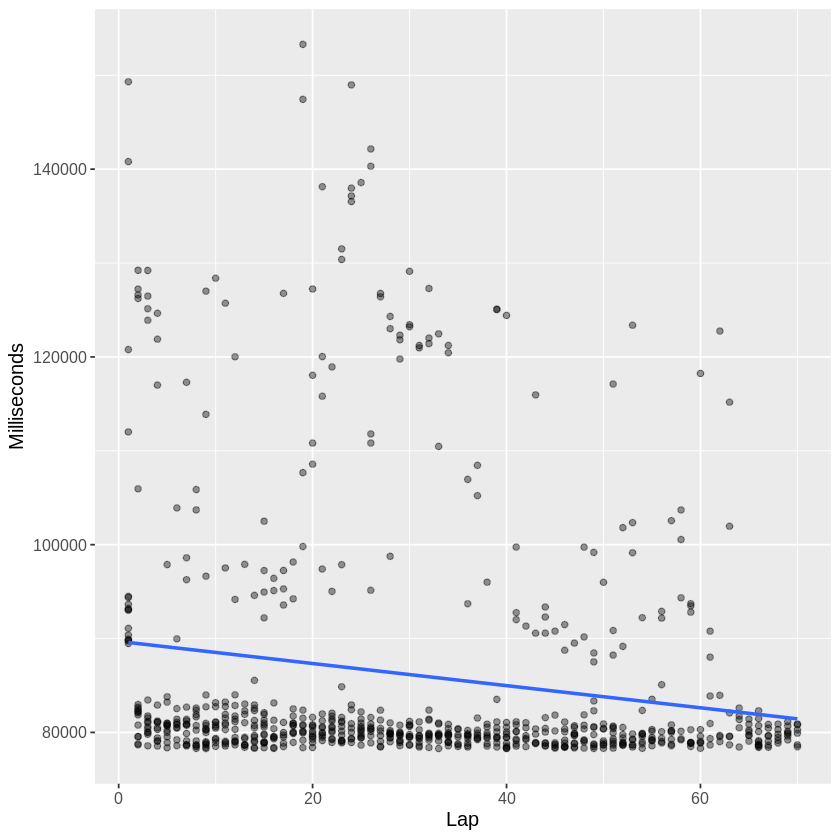

In [13]:
set.seed(2022)

#9. Canada

nl_canada <- wlms_lap %>%
                filter(raceId %in% canada_race_ID) 

nl_canada_clean <- nl_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_canada_clean
nl_canada_clean_ID <- nl_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_canada_races <- wlms_lap %>%
                    filter(raceId %in% nl_canada_clean_ID)  %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(nl_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

## RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

## GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1034,52
1035,51
1061,51


`geom_smooth()` using formula 'y ~ x'



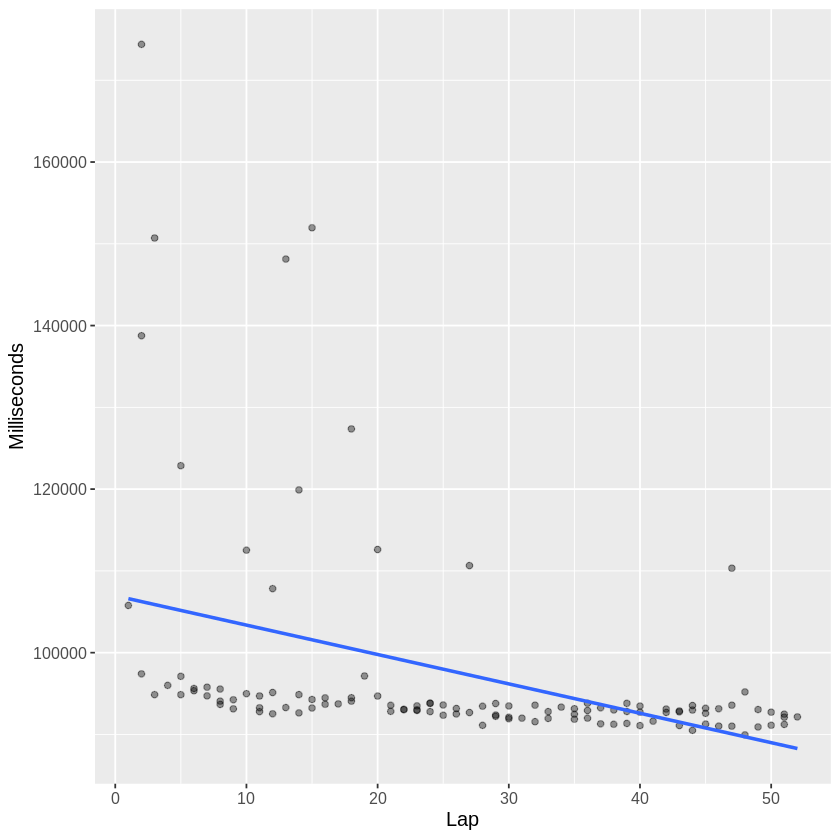

In [14]:
set.seed(2022)

#10. Great Britain

nl_uk <- lat_laps %>%
                filter(raceId %in% uk_race_ID) 

nl_uk_clean <- nl_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_uk_clean
nl_uk_clean_ID <- nl_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_uk_races <- lat_laps %>%
                    filter(raceId %in% nl_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(nl_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1031,71
1060,70
1032,69
1058,68


`geom_smooth()` using formula 'y ~ x'



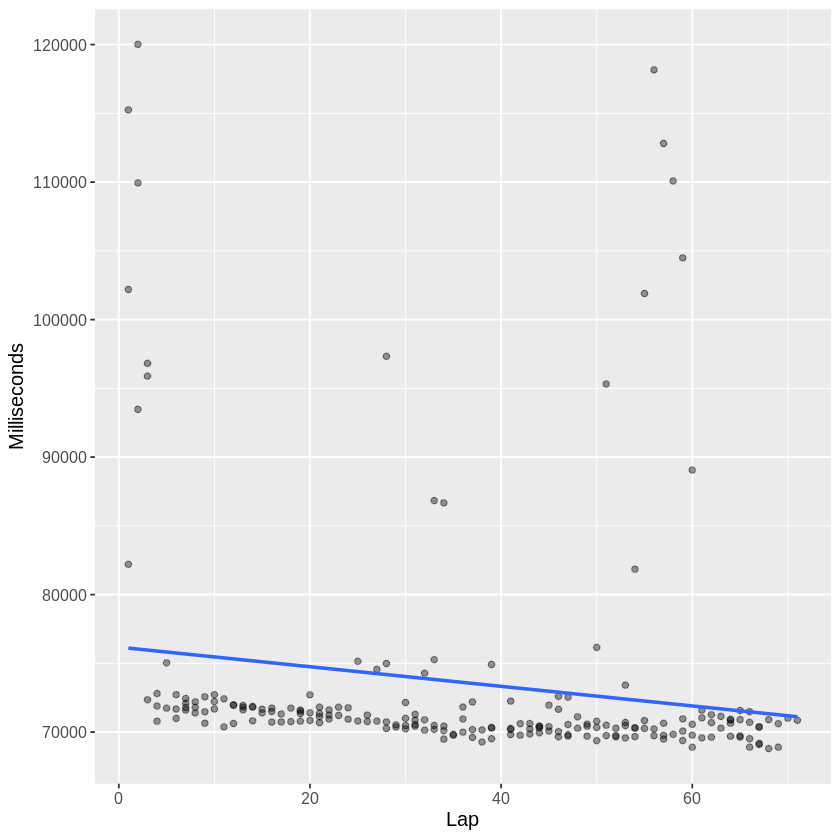

In [15]:
set.seed(2022)

#11. Austria

nl_austria <- lat_laps %>%
                filter(raceId %in% austria_race_ID) 

nl_austria_clean <- nl_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_austria_clean
nl_austria_clean_ID <- nl_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_austria_races <- lat_laps %>%
                    filter(raceId %in% nl_austria_clean_ID)

formulaone_split <- initial_split(nl_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1059,52


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



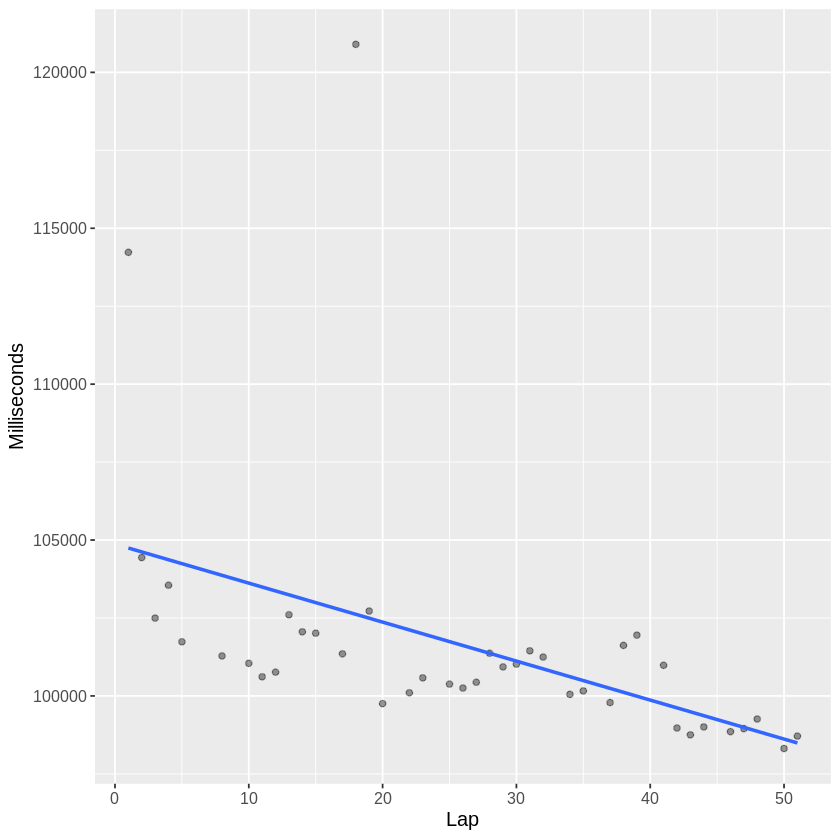

In [16]:
set.seed(2022)

#12. France

nl_france <- lat_laps %>%
                filter(raceId %in% france_race_ID) 

nl_france_clean <- nl_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_france_clean
nl_france_clean_ID <- nl_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_france_races <- lat_laps %>%
                    filter(raceId %in% nl_france_clean_ID)

formulaone_split <- initial_split(nl_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1062,70
1033,65


`geom_smooth()` using formula 'y ~ x'



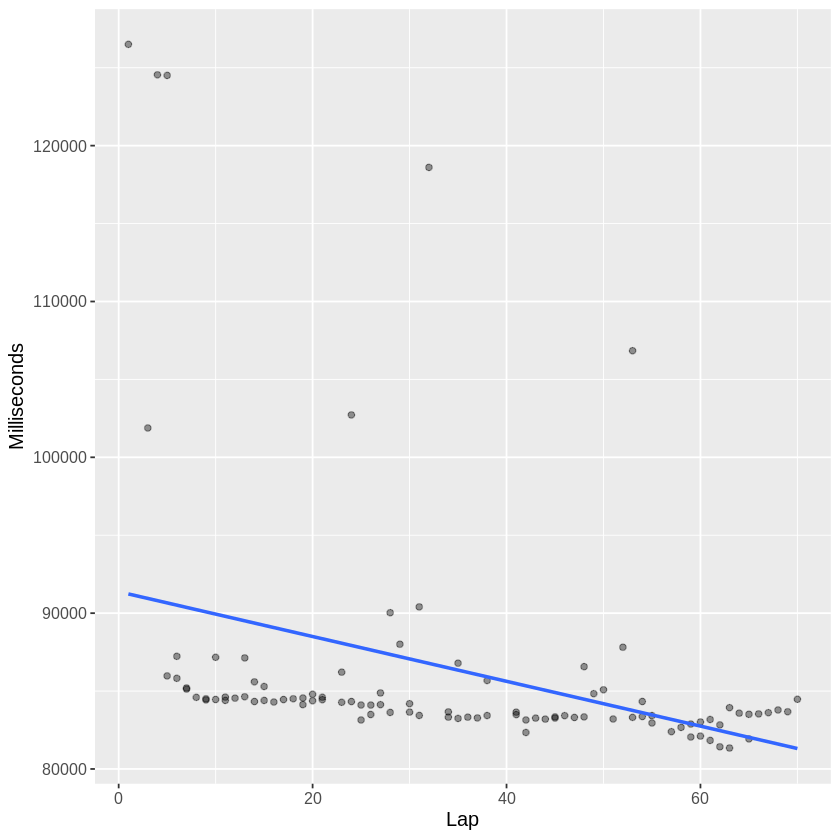

In [17]:
set.seed(2022)

#13. Hungary

nl_hungary <- lat_laps %>%
                filter(raceId %in% hungary_race_ID) 

nl_hungary_clean <- nl_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                      
nl_hungary_clean
nl_hungary_clean_ID <- nl_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_hungary_races <- lat_laps %>%
                    filter(raceId %in% nl_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(4:1000)

formulaone_split <- initial_split(nl_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1037,44
1063,1


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



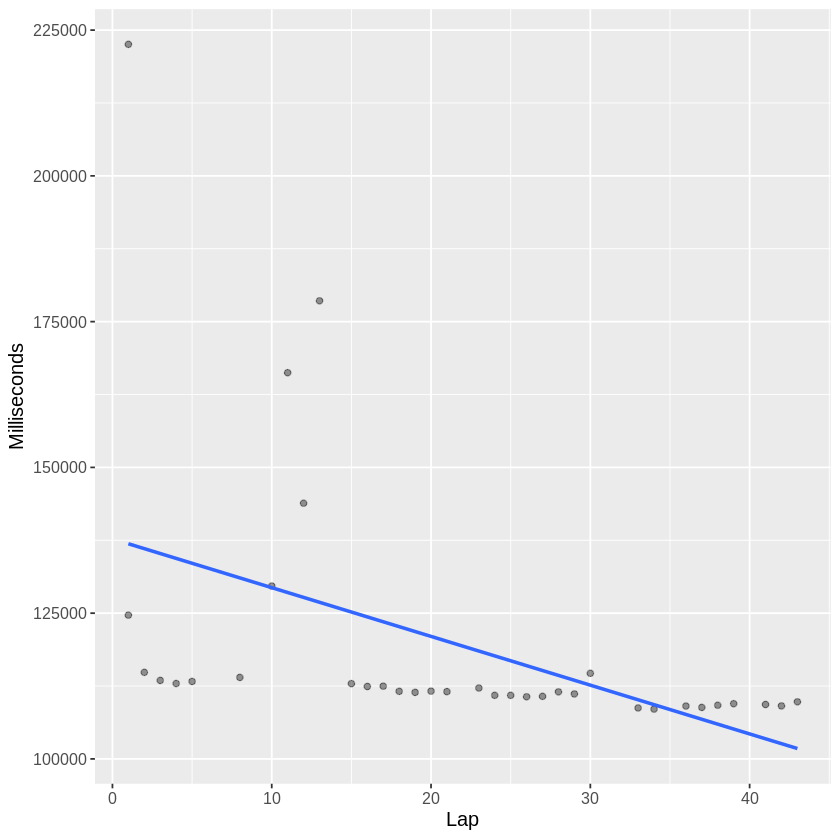

In [18]:
set.seed(2022)

#14. Belgium

nl_belgium <- lat_laps %>%
                filter(raceId %in% belgium_race_ID) 

nl_belgium_clean <- nl_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_belgium_clean
nl_belgium_clean_ID <- nl_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_belgium_races <- lat_laps %>%
                    filter(raceId %in% nl_belgium_clean_ID)

formulaone_split <- initial_split(nl_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

### GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



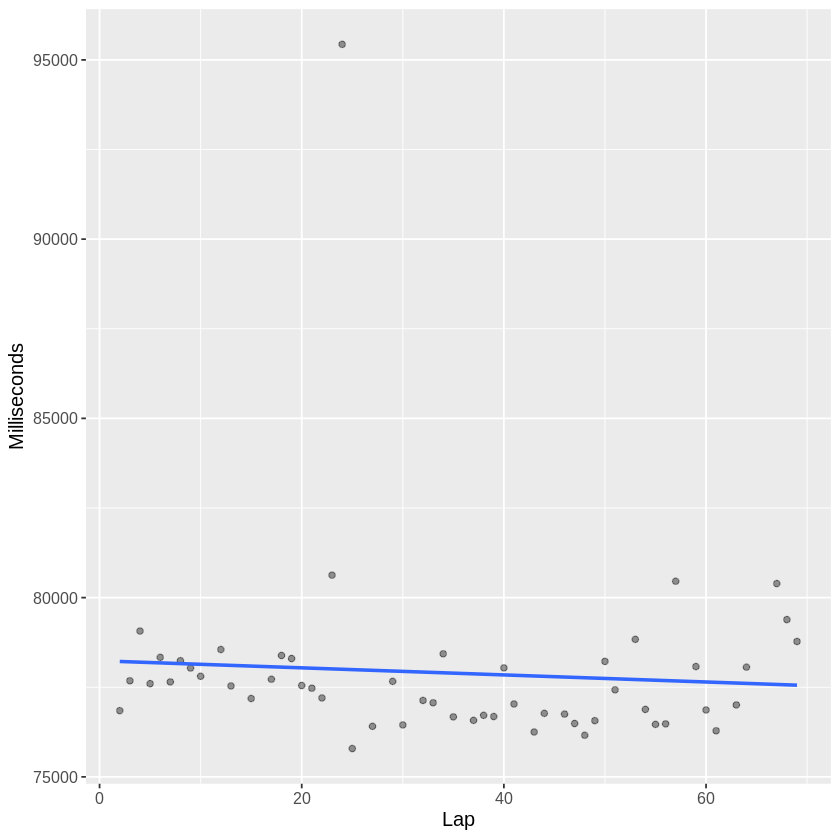

In [19]:
set.seed(2022)

#15. Netherlands

nl_netherlands <- lat_laps %>%
                filter(raceId %in% netherlands_race_ID) 

nl_netherlands_clean <- nl_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_netherlands_clean
nl_netherlands_clean_ID <- nl_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_netherlands_races <- lat_laps %>%
                    filter(raceId %in% nl_netherlands_clean_ID)

formulaone_split <- initial_split(nl_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1038,53
1065,53


`geom_smooth()` using formula 'y ~ x'



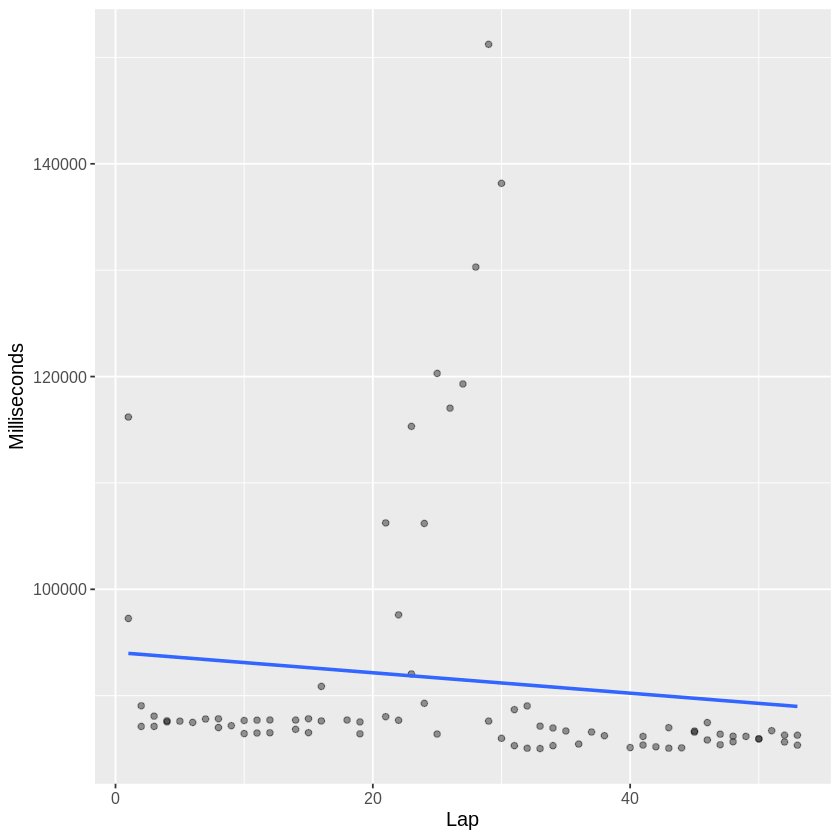

In [20]:
set.seed(2022)

#16. Italy, Monza

nl_monza <- lat_laps %>%
                filter(raceId %in% monza_race_ID) 

nl_monza_clean <- nl_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
nl_monza_clean
nl_monza_clean_ID <- nl_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_monza_races <- lat_laps %>%
                    filter(raceId %in% nl_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(nl_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

### GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
32,122
351,122
854,121
873,118
893,115
14,61
1024,61
913,60
962,60


`geom_smooth()` using formula 'y ~ x'



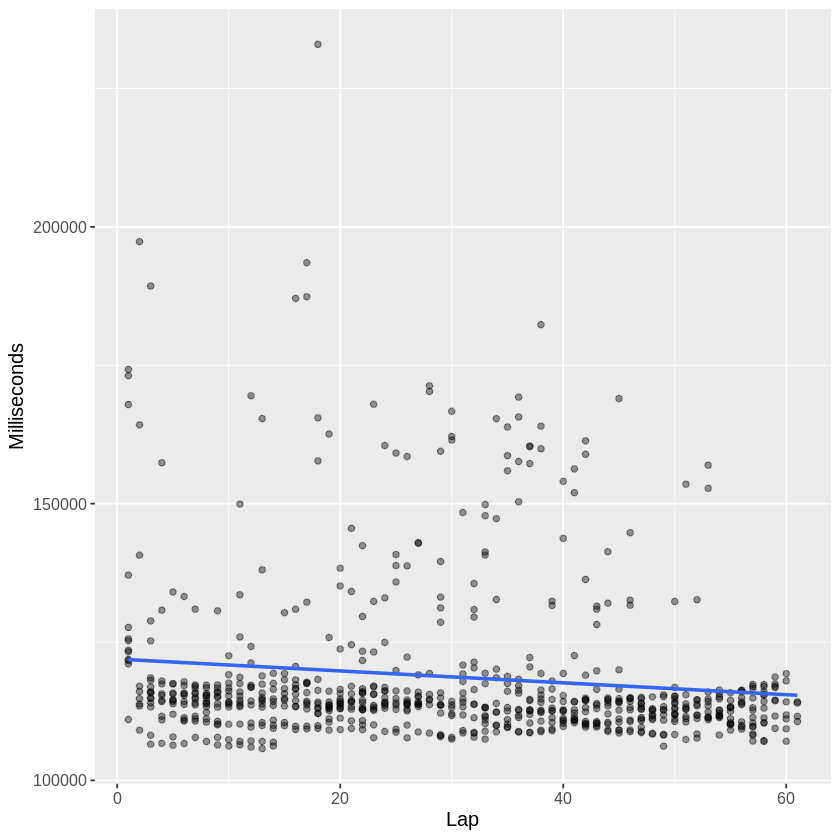

In [21]:
set.seed(2022)

#17. Singapore

nl_singapore <- wlms_lap %>%
                filter(raceId %in% singapore_race_ID) 

nl_singapore_clean <- nl_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_singapore_clean
nl_singapore_clean_ID <- nl_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_singapore_races <- wlms_lap %>%
                    filter(raceId %in% nl_singapore_clean_ID)

formulaone_split <- initial_split(nl_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

## GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
69,106
855,106
874,106
895,106
15,53
88,53
106,53
964,53
984,52


`geom_smooth()` using formula 'y ~ x'



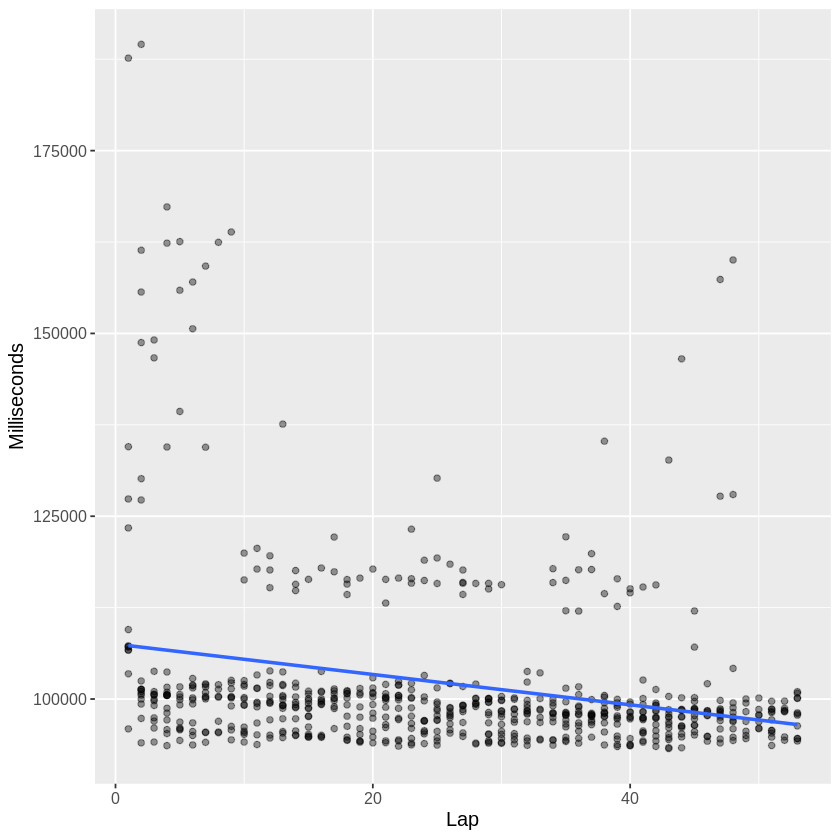

In [22]:
set.seed(2022)

#18. Japan

nl_japan <- wlms_lap %>%
                filter(raceId %in% japan_race_ID) 

nl_japan_clean <- nl_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
nl_japan_clean
nl_japan_clean_ID <- nl_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_japan_races <- wlms_lap %>%
                    filter(raceId %in% nl_japan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(nl_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

## GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1069,55


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



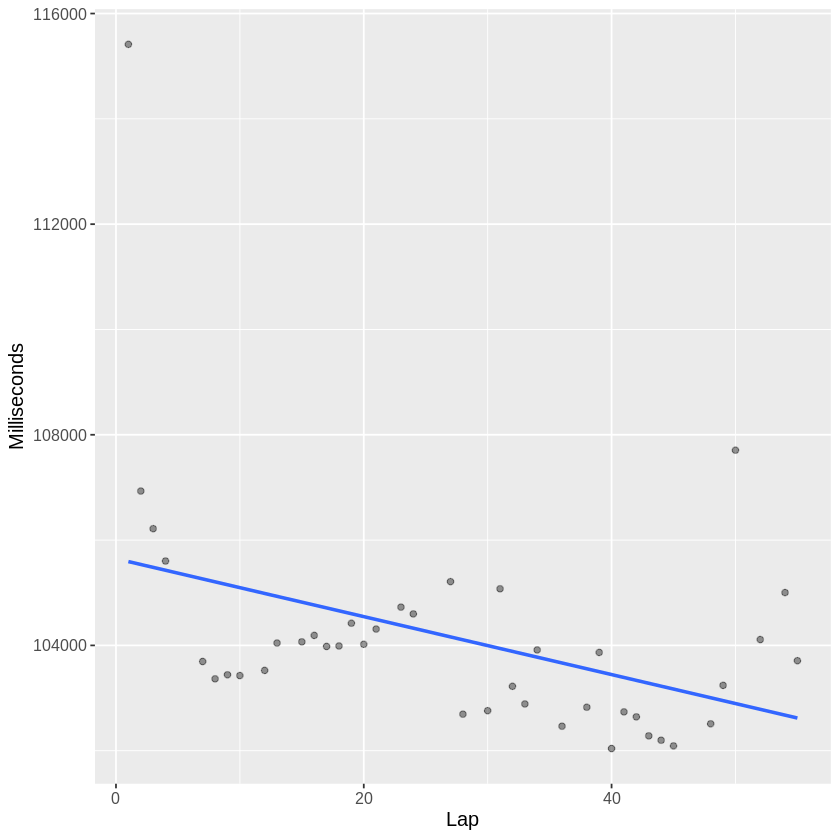

In [23]:
set.seed(2022)

#19 USA, Austin

nl_austin <- lat_laps %>%
                filter(raceId %in% austin_race_ID) 

nl_austin_clean <- nl_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_austin_clean
nl_austin_clean_ID <- nl_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_austin_races <- lat_laps %>%
                    filter(raceId %in% nl_austin_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(nl_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1070,69


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



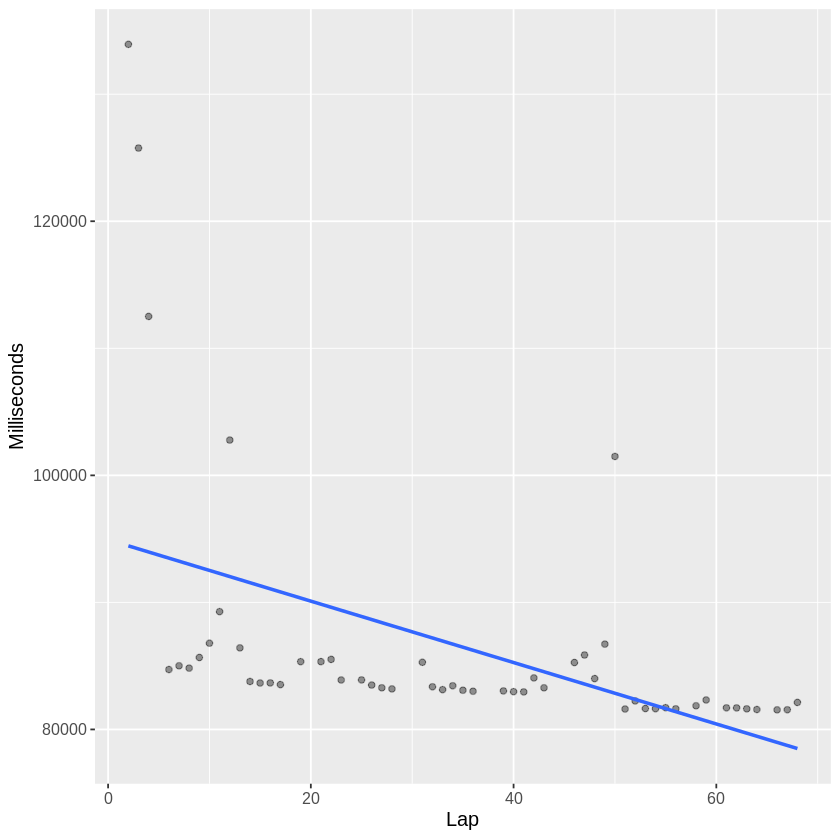

In [24]:
set.seed(2022)

#20. Mexico

nl_mexico <- lat_laps %>%
                filter(raceId %in% mexico_race_ID) 

nl_mexico_clean <- nl_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_mexico_clean
nl_mexico_clean_ID <- nl_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_mexico_races <- lat_laps %>%
                    filter(raceId %in% nl_mexico_clean_ID)

formulaone_split <- initial_split(nl_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

### GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1071,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



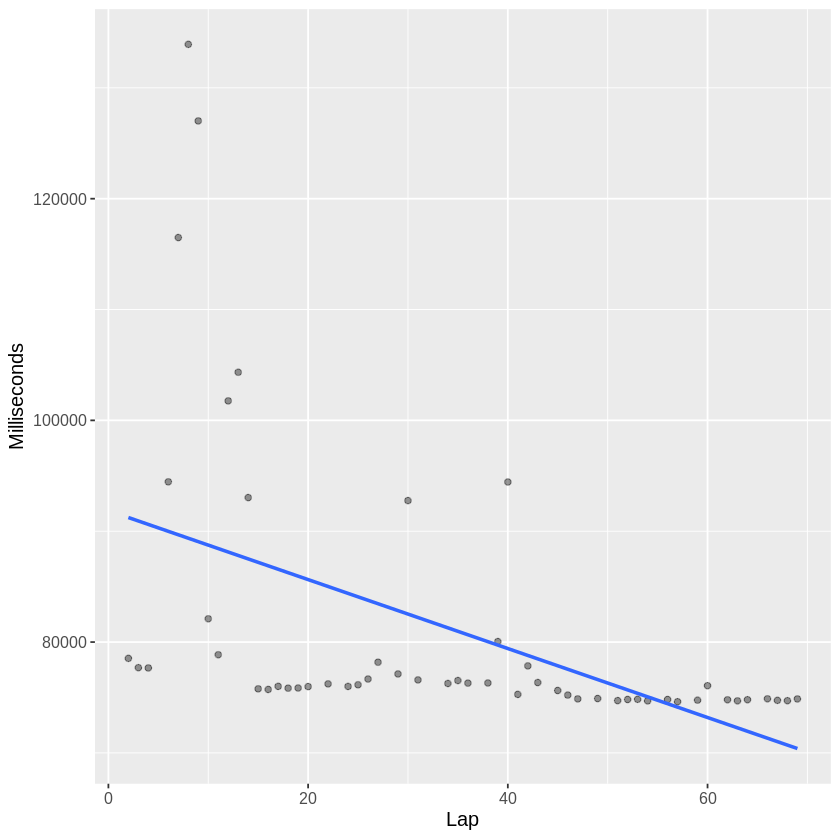

In [25]:
set.seed(2022)

#21. Brazil

nl_brazil <- lat_laps %>%
                filter(raceId %in% brazil_race_ID) 

nl_brazil_clean <- nl_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_brazil_clean
nl_brazil_clean_ID <- nl_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_brazil_races <- lat_laps %>%
                    filter(raceId %in% nl_brazil_clean_ID)

formulaone_split <- initial_split(nl_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1047,54


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



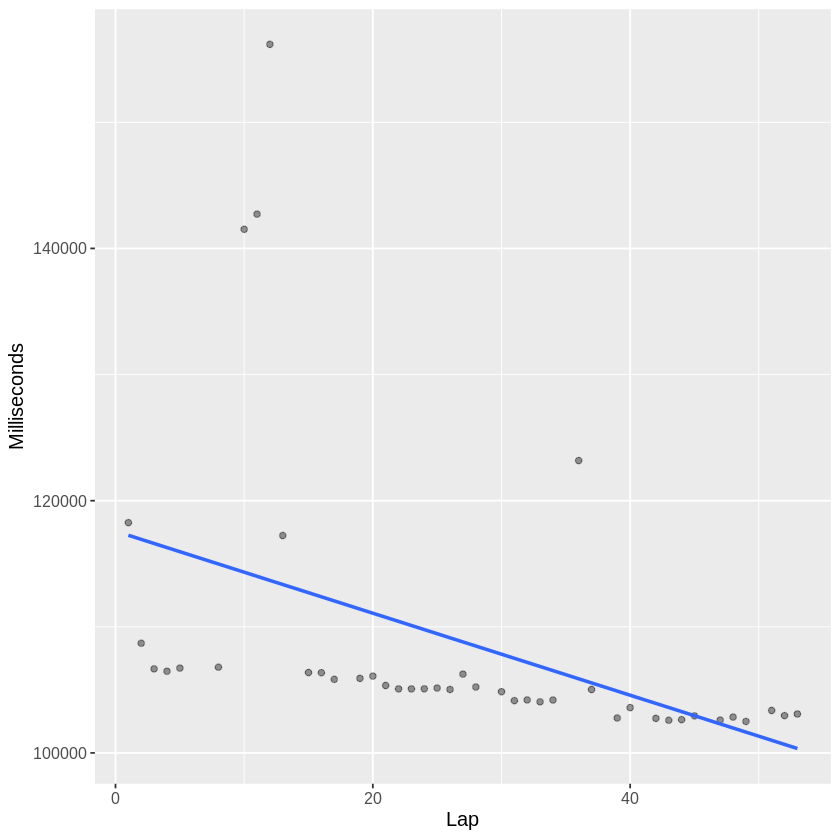

In [26]:
set.seed(2022)

#22. Abu Dhabi

nl_uae <- lat_laps %>%
                filter(raceId %in% uae_race_ID) 

nl_uae_clean <- nl_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
nl_uae_clean
nl_uae_clean_ID <- nl_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

nl_uae_races <- lat_laps %>%
                    filter(raceId %in% nl_uae_clean_ID)

formulaone_split <- initial_split(nl_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

get_uae_prediction()

## Collection

In [27]:
rmse_col
racetime_col

# write_csv(rmse_col, "nl_rmse.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,19648.753,1
rmse,standard,9566.011,2
rmse,standard,9264.773,3
rmse,standard,14514.628,4
rmse,standard,9242.558,5
rmse,standard,5638.164,6
rmse,standard,3966.558,7
rmse,standard,9884.357,8
rmse,standard,13671.343,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5869063,97.81772,1.630295,1
5675018,94.58364,1.576394,2
5552401,92.54002,1.542334,3
5339394,88.98991,1.483165,4
5899126,98.31877,1.638646,5
5708871,95.14785,1.585797,6
6072475,101.20792,1.686799,7
5995157,99.91928,1.665321,8
5986138,99.76896,1.662816,9
